In [1]:
%load_ext autoreload
%autoreload 2

# Applying CRIPS-DM Methodology to a Business Problem

## Dataset 1 - Predicting Customer Churn in the Telecomunication Provider

## 4. Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
logistic = pd.read_csv('../data/processed/model/1_logistic.csv')
svm_smote = pd.read_csv('../data/processed/model/2_svm_smote.csv')
svm = pd.read_csv('../data/processed/model/2_svm.csv')
dt_smote = pd.read_csv('../data/processed/model/3_dt_smote.csv')
dt = pd.read_csv('../data/processed/model/3_dt.csv')
rf_smote = pd.read_csv('../data/processed/model/4_rf_smote.csv')
rf = pd.read_csv('../data/processed/model/4_rf.csv')
gb_smote = pd.read_csv('../data/processed/model/5_gb_smote.csv')
gb = pd.read_csv('../data/processed/model/5_gb.csv')


In [29]:
models = {
    'Logistic Regression': logistic,
    'Support Vector Machine - SMOTE': svm_smote,
    'Support Vector Machine': svm,
    'Decision Tree - SMOTE': dt_smote,
    'Decision Tree': dt,
    'Random Forest - SMOTE': rf_smote,
    'Random Forest': rf,
    'Gradient Boosting - SMOTE': gb_smote,
    'Gradient Boosting': gb
}

In [30]:
all_models = pd.concat(models, keys=models.keys())

In [32]:
all_models = all_models.reset_index(level=1, drop=True)

In [35]:
all_models.sort_values(by='recall', ascending=False)

,accuracy,precision,recall,f1-score,roc-auc
Decision Tree,0.766176,0.347826,0.750000,0.475248,0.827367
Decision Tree - SMOTE,0.829412,0.426471,0.604167,0.500000,0.786779
Gradient Boosting,0.916176,0.782609,0.562500,0.654545,0.836116
Support Vector Machine,0.842647,0.452991,0.552083,0.497653,0.764421
Gradient Boosting - SMOTE,0.913235,0.793651,0.520833,0.628931,0.827822
Random Forest,0.892647,0.657534,0.500000,0.568047,0.815907
Random Forest - SMOTE,0.861765,0.511905,0.447917,0.477778,0.783604
Support Vector Machine - SMOTE,0.864706,0.528571,0.385417,0.445783,0.730825
Logistic Regression,0.875000,0.612245,0.312500,0.413793,0.715308


From the result above, the models with higher recall would be more suitable for our cases (Churn Prediction). We will try to see how was the model **(Decision Tree)** performing to the unseen data - the test set.

In [37]:
import joblib

In [39]:
decision_tree = joblib.load('../models/decision_tree.joblib')

In [40]:
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

In [46]:
y_preds = decision_tree.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
roc_auc = roc_auc_score(y_test, y_preds)

In [49]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Roc-auc: {roc_auc:.2f}")

Accuracy: 0.76
Precision: 0.34
Recall: 0.78
F1-score: 0.47
Roc-auc: 0.76


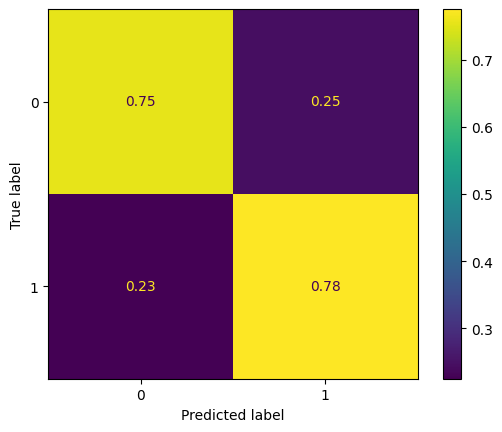

In [52]:
ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test, normalize='true')